In [196]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [197]:
meta = pd.read_csv('/content/Metadata_Country.csv')
population = pd.read_csv('/content/country_population.csv')
rate = pd.read_csv('/content/fertility_rate.csv')
expectancy = pd.read_csv('/content/life_expectancy.csv')

**Fertility** **dataset**

In [198]:
rate.shape

(264, 61)

In [199]:
rate.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635
2,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.478,7.524,7.563,7.592,7.611,7.619,...,6.368,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694
3,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,...,1.668,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713
4,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
rate.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')

In [201]:
rate = rate.drop(columns=['Indicator Code', 'Indicator Name'])

In [202]:
rate.isnull().sum()

Country Name     0
Country Code     0
1960            28
1961            27
1962            28
1963            29
1964            28
1965            28
1966            28
1967            28
1968            28
1969            28
1970            27
1971            26
1972            25
1973            27
1974            27
1975            26
1976            25
1977            26
1978            26
1979            26
1980            26
1981            24
1982            21
1983            24
1984            24
1985            24
1986            24
1987            20
1988            24
1989            24
1990            22
1991            22
1992            19
1993            23
1994            22
1995            20
1996            23
1997            19
1998            22
1999            21
2000            18
2001            18
2002            16
2003            18
2004            19
2005            17
2006            16
2007            15
2008            16
2009            16
2010        

In [203]:
rate.fillna(rate.mean(), inplace=True)

<ipython-input-203-b91ff347d27c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rate.fillna(rate.mean(), inplace=True)


In [204]:
years_to_round = [str(year) for year in range(1960, 2017)]
for year in years_to_round:
  rate[year] = rate[year].round(2)

In [205]:
rate.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,4.82,4.66,4.47,4.27,4.06,3.84,3.62,3.42,...,1.76,1.76,1.77,1.78,1.78,1.79,1.80,1.80,1.80,1.80
1,Afghanistan,AFG,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,...,6.46,6.25,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64
2,Angola,AGO,7.48,7.52,7.56,7.59,7.61,7.62,7.62,7.61,...,6.37,6.31,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69
3,Albania,ALB,6.49,6.40,6.28,6.13,5.96,5.77,5.58,5.39,...,1.67,1.65,1.65,1.65,1.67,1.68,1.70,1.71,1.71,1.71
4,Andorra,AND,5.51,5.49,5.50,5.50,5.46,5.42,5.37,5.33,...,1.18,1.25,1.19,1.27,2.88,2.84,2.82,2.79,2.76,2.73


In [206]:
Remove = rate[rate['Country Name'] == 'Not classified'].index
rate = rate.drop(Remove)
print(rate)


     Country Name Country Code  1960  1961  1962  1963  1964  1965  1966  \
0           Aruba          ABW  4.82  4.66  4.47  4.27  4.06  3.84  3.62   
1     Afghanistan          AFG  7.45  7.45  7.45  7.45  7.45  7.45  7.45   
2          Angola          AGO  7.48  7.52  7.56  7.59  7.61  7.62  7.62   
3         Albania          ALB  6.49  6.40  6.28  6.13  5.96  5.77  5.58   
4         Andorra          AND  5.51  5.49  5.50  5.50  5.46  5.42  5.37   
..            ...          ...   ...   ...   ...   ...   ...   ...   ...   
259        Kosovo          XKX  5.51  5.49  5.50  5.50  5.46  5.42  5.37   
260   Yemen, Rep.          YEM  7.49  7.53  7.58  7.62  7.66  7.70  7.74   
261  South Africa          ZAF  6.04  6.03  6.01  5.99  5.96  5.92  5.88   
262        Zambia          ZMB  7.12  7.17  7.21  7.25  7.27  7.29  7.30   
263      Zimbabwe          ZWE  7.16  7.22  7.27  7.31  7.35  7.37  7.39   

     1967  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
0    3.42 

In [207]:
rate.duplicated().sum()

0

**Population** **dataset**

In [208]:
population.shape

(264, 61)

In [209]:
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [210]:
population.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')

In [211]:
population.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)

In [212]:
population.fillna(population.mean(), inplace=True)

<ipython-input-212-77b74fffaca3>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  population.fillna(population.mean(), inplace=True)


In [213]:

population = population.round(decimals=0)

In [214]:
population.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [215]:
population.shape

(264, 59)

In [216]:
Remove = population[population['Country Name'] == 'Not classified'].index
population = population.drop(Remove)
print(population)

     Country Name Country Code        1960        1961        1962  \
0           Aruba          ABW     54211.0     55438.0     56225.0   
1     Afghanistan          AFG   8996351.0   9166764.0   9345868.0   
2          Angola          AGO   5643182.0   5753024.0   5866061.0   
3         Albania          ALB   1608800.0   1659800.0   1711319.0   
4         Andorra          AND     13411.0     14375.0     15370.0   
..            ...          ...         ...         ...         ...   
259        Kosovo          XKX    947000.0    966000.0    994000.0   
260   Yemen, Rep.          YEM   5172135.0   5260501.0   5351799.0   
261  South Africa          ZAF  17456855.0  17920673.0  18401608.0   
262        Zambia          ZMB   3044846.0   3140264.0   3240587.0   
263      Zimbabwe          ZWE   3747369.0   3870756.0   3999419.0   

           1963        1964        1965        1966        1967  ...  \
0       56695.0     57032.0     57360.0     57715.0     58055.0  ...   
1     9533954.0

**life** **expectancy**

In [217]:

expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
expectancy.shape

(264, 61)

In [219]:
expectancy = expectancy.fillna(expectancy.mean()).round(decimals=0)

<ipython-input-219-0bf33c51dcf3>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  expectancy = expectancy.fillna(expectancy.mean()).round(decimals=0)


In [220]:
expectancy.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)

In [221]:
expectancy.dropna(axis =0,inplace=True)

In [222]:
expectancy.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,66.0,66.0,66.0,67.0,67.0,67.0,68.0,68.0,...,75.0,75.0,75.0,75.0,75.0,75.0,75.0,76.0,76.0,76.0
1,Afghanistan,AFG,32.0,33.0,33.0,34.0,34.0,34.0,35.0,35.0,...,60.0,60.0,61.0,61.0,62.0,62.0,62.0,63.0,63.0,64.0
2,Angola,AGO,33.0,34.0,34.0,34.0,35.0,35.0,35.0,36.0,...,55.0,56.0,57.0,58.0,59.0,60.0,60.0,61.0,61.0,62.0
3,Albania,ALB,62.0,63.0,64.0,65.0,65.0,66.0,66.0,66.0,...,76.0,76.0,76.0,77.0,77.0,77.0,78.0,78.0,78.0,78.0
4,Andorra,AND,53.0,54.0,54.0,55.0,55.0,56.0,56.0,57.0,...,69.0,70.0,70.0,70.0,71.0,71.0,71.0,72.0,72.0,72.0


In [223]:
expectancy.shape

(264, 59)

In [224]:
Remove = expectancy[expectancy['Country Name'] == 'Not classified'].index
expectancy= expectancy.drop(Remove)
print(expectancy)

     Country Name Country Code  1960  1961  1962  1963  1964  1965  1966  \
0           Aruba          ABW  66.0  66.0  66.0  67.0  67.0  67.0  68.0   
1     Afghanistan          AFG  32.0  33.0  33.0  34.0  34.0  34.0  35.0   
2          Angola          AGO  33.0  34.0  34.0  34.0  35.0  35.0  35.0   
3         Albania          ALB  62.0  63.0  64.0  65.0  65.0  66.0  66.0   
4         Andorra          AND  53.0  54.0  54.0  55.0  55.0  56.0  56.0   
..            ...          ...   ...   ...   ...   ...   ...   ...   ...   
259        Kosovo          XKX  53.0  54.0  54.0  55.0  55.0  56.0  56.0   
260   Yemen, Rep.          YEM  34.0  34.0  35.0  35.0  36.0  37.0  37.0   
261  South Africa          ZAF  52.0  53.0  53.0  53.0  54.0  54.0  54.0   
262        Zambia          ZMB  45.0  46.0  46.0  46.0  47.0  47.0  47.0   
263      Zimbabwe          ZWE  52.0  52.0  52.0  53.0  53.0  53.0  54.0   

     1967  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
0    68.0 

In [225]:
expectancy.head

<bound method NDFrame.head of      Country Name Country Code  1960  1961  1962  1963  1964  1965  1966  \
0           Aruba          ABW  66.0  66.0  66.0  67.0  67.0  67.0  68.0   
1     Afghanistan          AFG  32.0  33.0  33.0  34.0  34.0  34.0  35.0   
2          Angola          AGO  33.0  34.0  34.0  34.0  35.0  35.0  35.0   
3         Albania          ALB  62.0  63.0  64.0  65.0  65.0  66.0  66.0   
4         Andorra          AND  53.0  54.0  54.0  55.0  55.0  56.0  56.0   
..            ...          ...   ...   ...   ...   ...   ...   ...   ...   
259        Kosovo          XKX  53.0  54.0  54.0  55.0  55.0  56.0  56.0   
260   Yemen, Rep.          YEM  34.0  34.0  35.0  35.0  36.0  37.0  37.0   
261  South Africa          ZAF  52.0  53.0  53.0  53.0  54.0  54.0  54.0   
262        Zambia          ZMB  45.0  46.0  46.0  46.0  47.0  47.0  47.0   
263      Zimbabwe          ZWE  52.0  52.0  52.0  53.0  53.0  53.0  54.0   

     1967  ...  2007  2008  2009  2010  2011  2012  2013 

In [226]:
years_to_round = [str(year) for year in range(1960, 2017)]
for year in years_to_round:
  expectancy[year] = expectancy[year].round(2)

In [227]:
expectancy.describe

<bound method NDFrame.describe of      Country Name Country Code  1960  1961  1962  1963  1964  1965  1966  \
0           Aruba          ABW  66.0  66.0  66.0  67.0  67.0  67.0  68.0   
1     Afghanistan          AFG  32.0  33.0  33.0  34.0  34.0  34.0  35.0   
2          Angola          AGO  33.0  34.0  34.0  34.0  35.0  35.0  35.0   
3         Albania          ALB  62.0  63.0  64.0  65.0  65.0  66.0  66.0   
4         Andorra          AND  53.0  54.0  54.0  55.0  55.0  56.0  56.0   
..            ...          ...   ...   ...   ...   ...   ...   ...   ...   
259        Kosovo          XKX  53.0  54.0  54.0  55.0  55.0  56.0  56.0   
260   Yemen, Rep.          YEM  34.0  34.0  35.0  35.0  36.0  37.0  37.0   
261  South Africa          ZAF  52.0  53.0  53.0  53.0  54.0  54.0  54.0   
262        Zambia          ZMB  45.0  46.0  46.0  46.0  47.0  47.0  47.0   
263      Zimbabwe          ZWE  52.0  52.0  52.0  53.0  53.0  53.0  54.0   

     1967  ...  2007  2008  2009  2010  2011  2012  2

In [228]:
expectancy.duplicated().sum()

0

**Meta** **Data**

In [229]:
meta.head

<bound method NDFrame.head of     Country Code                      Region          IncomeGroup  \
0            ABW   Latin America & Caribbean          High income   
1            AFG                  South Asia           Low income   
2            AGO          Sub-Saharan Africa  Lower middle income   
3            ALB       Europe & Central Asia  Upper middle income   
4            AND       Europe & Central Asia          High income   
..           ...                         ...                  ...   
258          XKX       Europe & Central Asia  Lower middle income   
259          YEM  Middle East & North Africa  Lower middle income   
260          ZAF          Sub-Saharan Africa  Upper middle income   
261          ZMB          Sub-Saharan Africa  Lower middle income   
262          ZWE          Sub-Saharan Africa           Low income   

                                          SpecialNotes     TableName  \
0    SNA data for 2000-2011 are updated from offici...         Aruba 

In [230]:
meta= meta.drop(columns= 'Unnamed: 5')

In [231]:
meta

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra
...,...,...,...,...,...
258,XKX,Europe & Central Asia,Lower middle income,WB-3 code changed from KSV to XKX to align wit...,Kosovo
259,YEM,Middle East & North Africa,Lower middle income,Based on official government statistics and In...,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,The base year is 2010. National accounts data ...,Zambia


**Merging**

In [232]:
df1 = expectancy.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Life Expectancy')

In [256]:
df1

,Country Name,Country Code,Year,Life Expectancy
0,Aruba,ABW,1960,66.0
1,Afghanistan,AFG,1960,32.0
2,Angola,AGO,1960,33.0
3,Albania,ALB,1960,62.0
4,Andorra,AND,1960,53.0
...,...,...,...,...
14986,Kosovo,XKX,2016,72.0
14987,"Yemen, Rep.",YEM,2016,65.0
14988,South Africa,ZAF,2016,63.0
14989,Zambia,ZMB,2016,62.0


In [257]:
df2 = rate.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Fertility Rate')

In [258]:
df2

,Country Name,Country Code,Year,Fertility Rate
0,Aruba,ABW,1960,4.82
1,Afghanistan,AFG,1960,7.45
2,Angola,AGO,1960,7.48
3,Albania,ALB,1960,6.49
4,Andorra,AND,1960,5.51
...,...,...,...,...
14986,Kosovo,XKX,2016,2.06
14987,"Yemen, Rep.",YEM,2016,4.00
14988,South Africa,ZAF,2016,2.46
14989,Zambia,ZMB,2016,4.98


In [259]:
df3= population.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Country Population')

In [260]:
df3

,Country Name,Country Code,Year,Country Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0
...,...,...,...,...
14986,Kosovo,XKX,2016,1816200.0
14987,"Yemen, Rep.",YEM,2016,27584213.0
14988,South Africa,ZAF,2016,56015473.0
14989,Zambia,ZMB,2016,16591390.0


In [275]:
print(df1)
print(df2)
print(df3)

       Country Name Country Code  Year  Life Expectancy
0             Aruba          ABW  1960             66.0
1       Afghanistan          AFG  1960             32.0
2            Angola          AGO  1960             33.0
3           Albania          ALB  1960             62.0
4           Andorra          AND  1960             53.0
...             ...          ...   ...              ...
14986        Kosovo          XKX  2016             72.0
14987   Yemen, Rep.          YEM  2016             65.0
14988  South Africa          ZAF  2016             63.0
14989        Zambia          ZMB  2016             62.0
14990      Zimbabwe          ZWE  2016             61.0

[14991 rows x 4 columns]
       Country Name Country Code  Year  Fertility Rate
0             Aruba          ABW  1960            4.82
1       Afghanistan          AFG  1960            7.45
2            Angola          AGO  1960            7.48
3           Albania          ALB  1960            6.49
4           Andorra        

In [276]:
merged_df = pd.merge(df3, df2, on=['Country Name', 'Country Code', 'Year'], how='inner')

In [277]:
merged_df = pd.merge(merged_df, df1, on=['Country Name', 'Country Code', 'Year'], how='inner')

In [278]:
merged_df

,Country Name,Country Code,Year,Country Population,Fertility Rate,Life Expectancy
0,Aruba,ABW,1960,54211.0,4.82,66.0
1,Afghanistan,AFG,1960,8996351.0,7.45,32.0
2,Angola,AGO,1960,5643182.0,7.48,33.0
3,Albania,ALB,1960,1608800.0,6.49,62.0
4,Andorra,AND,1960,13411.0,5.51,53.0
...,...,...,...,...,...,...
14986,Kosovo,XKX,2016,1816200.0,2.06,72.0
14987,"Yemen, Rep.",YEM,2016,27584213.0,4.00,65.0
14988,South Africa,ZAF,2016,56015473.0,2.46,63.0
14989,Zambia,ZMB,2016,16591390.0,4.98,62.0


In [279]:
df = pd.merge(merged_df, meta, on='Country Code')

In [280]:
df

,Country Name,Country Code,Year,Country Population,Fertility Rate,Life Expectancy,Region,IncomeGroup,SpecialNotes,TableName
0,Aruba,ABW,1960,54211.0,4.82,66.0,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
1,Aruba,ABW,1961,55438.0,4.66,66.0,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
2,Aruba,ABW,1962,56225.0,4.47,66.0,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
3,Aruba,ABW,1963,56695.0,4.27,67.0,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
4,Aruba,ABW,1964,57032.0,4.06,67.0,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
...,...,...,...,...,...,...,...,...,...,...
14986,Zimbabwe,ZWE,2012,14710826.0,4.00,57.0,Sub-Saharan Africa,Low income,Fiscal year end: June 30; reporting period for...,Zimbabwe
14987,Zimbabwe,ZWE,2013,15054506.0,3.96,58.0,Sub-Saharan Africa,Low income,Fiscal year end: June 30; reporting period for...,Zimbabwe
14988,Zimbabwe,ZWE,2014,15411675.0,3.90,59.0,Sub-Saharan Africa,Low income,Fiscal year end: June 30; reporting period for...,Zimbabwe
14989,Zimbabwe,ZWE,2015,15777451.0,3.84,60.0,Sub-Saharan Africa,Low income,Fiscal year end: June 30; reporting period for...,Zimbabwe


In [281]:
df.columns

Index(['Country Name', 'Country Code', 'Year', 'Country Population',
       'Fertility Rate', 'Life Expectancy', 'Region', 'IncomeGroup',
       'SpecialNotes', 'TableName'],
      dtype='object')

In [282]:
final_columns = [
    'Country Name', 'Country Code', 'Year',
                 'Country Population', 'Fertility Rate','Life Expectancy',
                 'Region', 'IncomeGroup'
                 ]
df = df[final_columns]

In [283]:
df

,Country Name,Country Code,Year,Country Population,Fertility Rate,Life Expectancy,Region,IncomeGroup
0,Aruba,ABW,1960,54211.0,4.82,66.0,Latin America & Caribbean,High income
1,Aruba,ABW,1961,55438.0,4.66,66.0,Latin America & Caribbean,High income
2,Aruba,ABW,1962,56225.0,4.47,66.0,Latin America & Caribbean,High income
3,Aruba,ABW,1963,56695.0,4.27,67.0,Latin America & Caribbean,High income
4,Aruba,ABW,1964,57032.0,4.06,67.0,Latin America & Caribbean,High income
...,...,...,...,...,...,...,...,...
14986,Zimbabwe,ZWE,2012,14710826.0,4.00,57.0,Sub-Saharan Africa,Low income
14987,Zimbabwe,ZWE,2013,15054506.0,3.96,58.0,Sub-Saharan Africa,Low income
14988,Zimbabwe,ZWE,2014,15411675.0,3.90,59.0,Sub-Saharan Africa,Low income
14989,Zimbabwe,ZWE,2015,15777451.0,3.84,60.0,Sub-Saharan Africa,Low income


In [284]:
df.columns

Index(['Country Name', 'Country Code', 'Year', 'Country Population',
       'Fertility Rate', 'Life Expectancy', 'Region', 'IncomeGroup'],
      dtype='object')

**Animated** **Figures** **for** **Insights**




In [305]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Define the year intervals
year_intervals = [(1950, 1980), (1981, 2000), (2001, 2010),(2011,2016)]

<ipython-input-305-2682cc249ce1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_numeric(df['Year'], errors='coerce')


In [306]:
# Create a new column 'Year Group' based on the intervals
df['Year Group'] = pd.cut(df['Year'],
                          bins=[interval[0] - 1 for interval in year_intervals] + [max(interval[1] for interval in year_intervals)],
                          labels=['{}-{}'.format(interval[0], interval[1]) for interval in year_intervals], include_lowest=True)


<ipython-input-306-98b687cb12f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year Group'] = pd.cut(df['Year'],


In [321]:
#'Fertility Rate vs Life Expectancy Over Time
fig = px.scatter(df,
                 x="Fertility Rate",
                 y="Life Expectancy",
                 animation_frame="Year",
                 animation_group="Country Code",
                 size="Country Population",
                 size_max=180,
                 hover_name="Country Name",
                 color="Region",
                 labels={'Region': 'Region'},
                 range_x=[0, 15],
                 range_y=[15, 100],
                 title='Fertility Rate vs Life Expectancy Over Time')
fig.show()

In [322]:
#map analysis
px.choropleth(df, locations="Country Code", color="Life Expectancy",  scope="asia", hover_name="Country Name", animation_frame="Year", animation_group="Country Code")

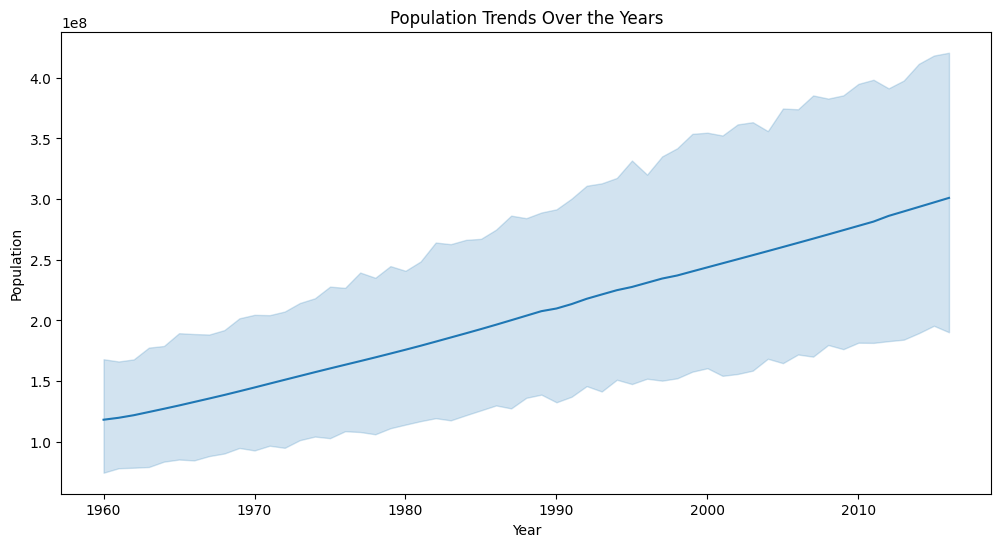

In [312]:
# Line graph for Population Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Country Population')
plt.title('Population Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

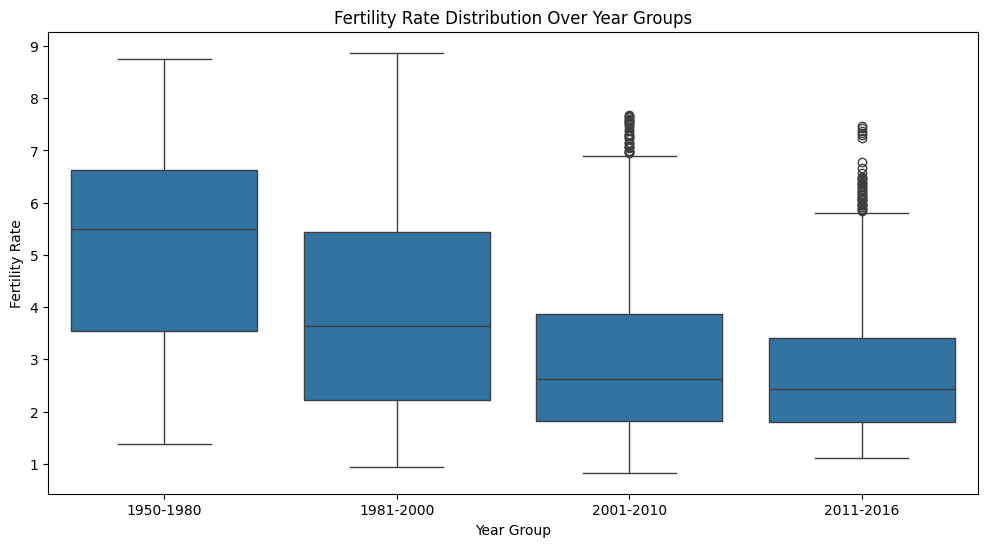

In [307]:
#Fertility Rate Distributio Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Year Group', y='Fertility Rate')
plt.title('Fertility Rate Distribution Over Year Groups')
plt.xlabel('Year Group')
plt.ylabel('Fertility Rate')
plt.show()

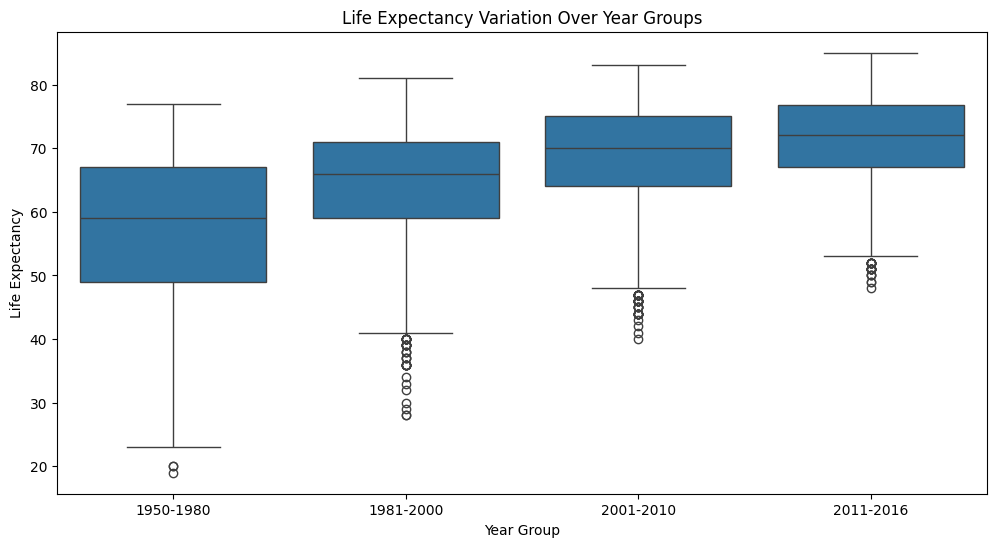

In [309]:
# Life Expectancy Variation grouped by Year Group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Year Group', y='Life Expectancy')
plt.title('Life Expectancy Variation Over Year Groups')
plt.xlabel('Year Group')
plt.ylabel('Life Expectancy')
plt.show()

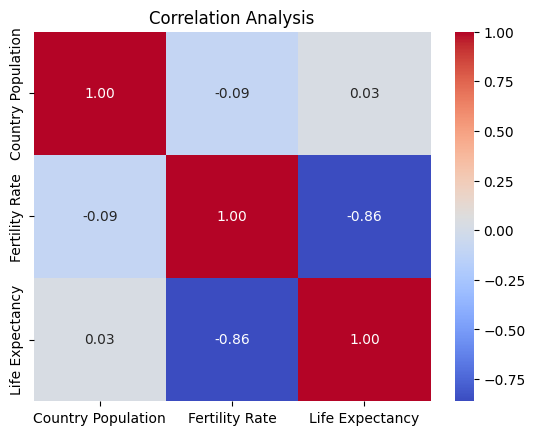

In [308]:
# Correlation Analysis
correlation_matrix = df[['Country Population', 'Fertility Rate', 'Life Expectancy']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Analysis')
plt.show()

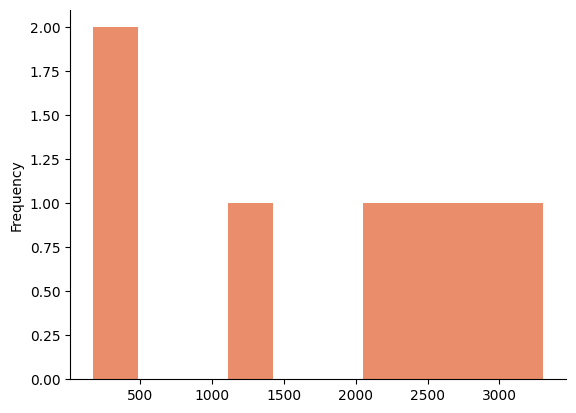

In [313]:
#Regional Analysis
import seaborn as sns
import matplotlib.pyplot as plt
df.groupby('Region').size().plot(kind='hist', color=sns.palettes.mpl_palette('flare'))
plt.gca().spines[['top', 'right',]].set_visible(False)